### Hw. 6 APPM
## Problem 1
full Newton's




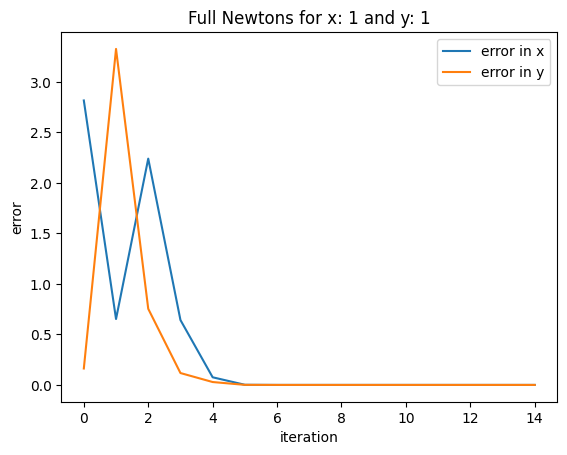

converges to: [-1.81626407  0.8373678 ]


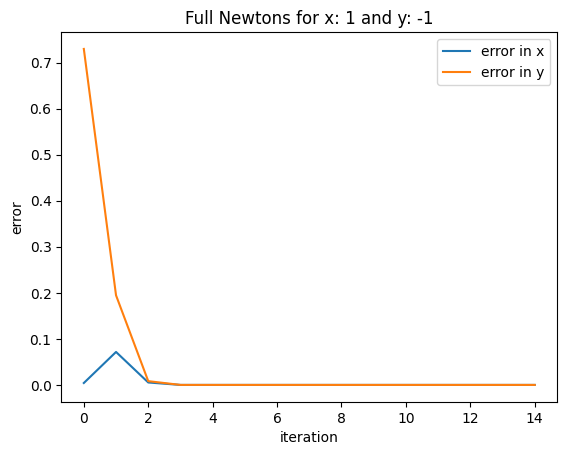

converges to: [ 1.00416874 -1.72963729]


LinAlgError: ignored

In [57]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# functions
def f(args):
  return args[0]**2 + args[1]**2 - 4

def g(args):
  return np.exp(args[0]) + args[1] - 1

def J(args):
  x = args[0]
  y = args[1]
  a = 2*x
  b = 2*y
  c = np.exp(x)
  d = 1
  temp = np.array([[a, b],[c, d]])
  return np.linalg.inv(temp)

def newtons(x0, y0, nMax):
  y = np.zeros([2,nMax])
  y[:,0] = np.array([x0, y0])

  # calculating sequences
  for i in range(1, nMax):
    y[:,i] = y[:,i-1] - (J(y[:, i-1]) @ np.array([f(y[:,i-1]), g(y[:, i-1])]))

    # calculating convergence behavior
  e = np.zeros([2,nMax])
  for i in range(nMax):
    e[0, i] = abs(y[0, i] - y[0, -1])
    e[1, i] = abs(y[1, i] - y[1, -1])

  # displaying convergence behavior
  plt.plot(range(nMax), e[0,:], label='error in x')
  plt.plot(range(nMax), e[1,:], label='error in y')
  plt.title(str("Full Newtons for x: "+str(x0)+' and y: '+str(y0)))
  plt.xlabel('iteration')
  plt.ylabel('error')
  plt.legend()
  plt.show()
  print("converges to:", y[:,-1])
  return

# parameters
x0s = [1, 1, 0]
y0s = [1, -1, 0]
nMax = 15

for i in range(len(x0s)):
  # calling Newtons
  newtons(x0s[i], y0s[i], nMax)


As we can see, two sets of those matrices converge and one does not due to the Jacobian being singular.

Now we do Lazy Newton

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# functions
def f(args):
  return args[0]**2 + args[1]**2 - 4

def g(args):
  return np.exp(args[0]) + args[1] - 1

def J(args):
  x = args[0]
  y = args[1]
  a = 2*x
  b = 2*y
  c = np.exp(x)
  d = 1
  temp = np.array([[a, b],[c, d]])
  return np.linalg.inv(temp)

def lazy_newtons(x0, y0, nMax):
  y = np.zeros([2,nMax])
  y[:,0] = np.array([x0, y0])

  # calculating sequences
  for i in range(1, nMax):
    y[:,i] = y[:,i-1] - (J(y[:, 0]) @ np.array([f(y[:,i-1]), g(y[:, i-1])]))

    # calculating convergence behavior
  e = np.zeros([2,nMax])
  for i in range(nMax):
    e[0, i] = abs(y[0, i] - y[0, -1])
    e[1, i] = abs(y[1, i] - y[1, -1])

  # displaying convergence behavior
  plt.plot(range(nMax), e[0,:], label='error in x')
  plt.plot(range(nMax), e[1,:], label='error in y')
  plt.title(str("Full Newtons for x: "+str(x0)+' and y: '+str(y0)))
  plt.xlabel('iteration')
  plt.ylabel('error')
  plt.legend()
  plt.show()
  print("converges to:", y[:,-1])
  return

# parameters
x0s = [1, 1, 0]
y0s = [1, -1, 0]
nMax = 15

for i in range(len(x0s)):
  # calling Newtons
  lazy_newtons(x0s[i], y0s[i], nMax)


As we can see, this is even less well behaved than full Newton. As only 1 of the three initial conditions led to convergence. The convergence was also slower.

Now for Broydens (I just adapted the class code for this one)


In [67]:
import numpy as np
import math
import time
from numpy.linalg import inv
from numpy.linalg import norm

def f(args):
  return args[0]**2 + args[1]**2 - 4

def g(args):
  return np.exp(args[0]) + args[1] - 1

def evalF(x):
    F = np.zeros(2)
    F[0] = f(x)
    F[1] = g(x)
    return F

def evalJ(args):
  x = args[0]
  y = args[1]
  a = 2*x
  b = 2*y
  c = np.exp(x)
  d = 1
  temp = np.array([[a, b],[c, d]])
  return temp

def Broyden(x0,tol,Nmax):
    '''tol = desired accuracy
    Nmax = max number of iterations'''

    '''Sherman-Morrison
   (A+xy^T)^{-1} = A^{-1}-1/p*(A^{-1}xy^TA^{-1})
    where p = 1+y^TA^{-1}Ax'''

    '''In Newton
    x_k+1 = xk -(G(x_k))^{-1}*F(x_k)'''


    '''In Broyden
    x = [F(xk)-F(xk-1)-\hat{G}_k-1(xk-xk-1)
    y = x_k-x_k-1/||x_k-x_k-1||^2'''

    ''' implemented as in equation (10.16) on page 650 of text'''

    '''initialize with 1 newton step'''

    A0 = evalJ(x0)

    v = evalF(x0)
    A = np.linalg.inv(A0)

    s = -A.dot(v)
    xk = x0+s
    for  its in range(Nmax):
       '''(save v from previous step)'''
       w = v
       ''' create new v'''
       v = evalF(xk)
       '''y_k = F(xk)-F(xk-1)'''
       y = v-w;
       '''-A_{k-1}^{-1}y_k'''
       z = -A.dot(y)
       ''' p = s_k^tA_{k-1}^{-1}y_k'''
       p = -np.dot(s,z)
       u = np.dot(s,A)
       ''' A = A_k^{-1} via Morrison formula'''
       tmp = s+z
       tmp2 = np.outer(tmp,u)
       A = A+1./p*tmp2
       ''' -A_k^{-1}F(x_k)'''
       s = -A.dot(v)
       xk = xk+s
       if (norm(s)<tol):
          alpha = xk
          ier = 0
          return[alpha,ier,its]
    alpha = xk
    ier = 1
    return[alpha,ier,its]

# parameters
x0s = [1, 1]
y0s = [1, -1]
tol = 0.05
nMax = 15
for i in range(len(x0s)):
  input = np.array([x0s[i], y0s[i]])
  # calling Newtons
  out = Broyden(input, tol, nMax)
  print('Error Message:', out[1])
  print('its', out[2])

Error Message: 0
its 6
Error Message: 0
its 1


Interestingly, it was faster for the 2nd set if initial conditions but slower for the first set. I suspect that in general it is slower than Newton's and this is due to some variance. As my tolerance is only set to 0.05, which is what I can accuratly use to compare to part a.

### Problem 2

implementation of 3D Newtons

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# functions
def f(args):
  x = args[0]
  y = args[1]
  z = args[2]
  return x + np.cos(x*y*z)

def g(args):
  x = args[0]
  y = args[1]
  z = args[2]
  return (1-x)**(.25) + y + 0.05*z**2 - 0.15*z - 1

def h(args):
  x = args[0]
  y = args[1]
  z = args[2]
  return -1*x**2 - 0.1*y**2 + 0.01*y + z - 1


def J(args):
  x = args[0]
  y = args[1]
  z = args[2]
  a1 = 1-y*z*(np.sin(x*y*z))
  a2 = -1*x*z*(np.sin(x*y*z))
  a3 = -1*x*y*(np.sin(x*y*z))
  b1 = -0.25*(1-x)**(-0.75)
  b2 = 1
  b3 = 0.1*z - 0.15
  c1 = -2*x
  c2 = -0.2*y + 0.01
  c3 = 1
  temp = np.array([[a1, a2, a3],[b1, b2, b3], [c1, c2, c3]])
  return np.linalg.inv(temp)

def newtons_threeD(x0, y0, z0, nMax):
  y = np.zeros([3,nMax])
  y[:,0] = np.array([x0, y0, z0])

  # calculating sequences
  for i in range(1, nMax):
    y[:,i] = y[:,i-1] - (J(y[:, i-1]) @ np.array([f(y[:,i-1]), g(y[:, i-1]), h(y[:, i-1])]))

    # calculating convergence behavior
  e = np.zeros([3,nMax])
  for i in range(nMax):
    e[0, i] = abs(y[0, i] - y[0, -1])
    e[1, i] = abs(y[1, i] - y[1, -1])
    e[2, i] = abs(y[2, i] - y[2, -1])

  # displaying convergence behavior
  plt.plot(range(nMax), e[0,:], label='error in x')
  plt.plot(range(nMax), e[1,:], label='error in y')
  plt.plot(range(nMax), e[2,:], label='error in z')
  plt.title(str("Full Newtons for x: "+str(x0)+' y: '+str(y0)+' and z: '+str(z0)))
  plt.xlabel('iteration')
  plt.ylabel('error')
  plt.legend()
  plt.show()
  print("converges to:", y[:,-1])
  return

# parameters
x0s = [1, 1, 0]
y0s = [1, -1, 0]
z0s = [1, -1, 0]
nMax = 15

for i in range(len(x0s)):
  # calling Newtons
  newtons_threeD(x0s[i], y0s[i], z0s[i], nMax)


Pretty rewarding to see that my mastery of Newton's has gotten to the level where I can whip this up pretty quickly. It's intersting to not that these can converge to different solutions to the system.

Now for Steepest descent

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# functions
def f(args):
  x = args[0]
  y = args[1]
  z = args[2]
  return x + np.cos(x*y*z)

def g(args):
  x = args[0]
  y = args[1]
  z = args[2]
  return (1-x)**(.25) + y + 0.05*z**2 - 0.15*z - 1

def h(args):
  x = args[0]
  y = args[1]
  z = args[2]
  return -1*x**2 - 0.1*y**2 + 0.01*y + z - 1


def J(args):
  x = args[0]
  y = args[1]
  z = args[2]
  a1 = 1-y*z*(np.sin(x*y*z))
  a2 = -1*x*z*(np.sin(x*y*z))
  a3 = -1*x*y*(np.sin(x*y*z))
  b1 = -0.25*(1-x)**(-0.75)
  b2 = 1
  b3 = 0.1*z - 0.15
  c1 = -2*x
  c2 = -0.2*y + 0.01
  c3 = 1
  temp = np.array([[a1, a2, a3],[b1, b2, b3], [c1, c2, c3]])
  return np.linalg.inv(temp)

def steepest_descent(x0, y0, z0, nMax):
  y = np.zeros([3,nMax])
  y[:,0] = np.array([x0, y0, z0])

  # calculating sequences
  for i in range(1, nMax):
    # B = min((y[:,i-1] @ y[:,i-1])/(nMax), 0.001)  # I made up my own way to find B
    B = 0.001
    y[:,i] = y[:,i-1] - 2*B*(np.transpose(J(y[:, i-1]))) @ np.array([f(y[:,i-1]), g(y[:, i-1]), h(y[:, i-1])])

    # calculating convergence behavior
  e = np.zeros([3,nMax])
  for i in range(nMax):
    e[0, i] = abs(y[0, i] - y[0, -1])
    e[1, i] = abs(y[1, i] - y[1, -1])
    e[2, i] = abs(y[2, i] - y[2, -1])

  # displaying convergence behavior
  plt.plot(range(nMax), e[0,:], label='error in x')
  plt.plot(range(nMax), e[1,:], label='error in y')
  plt.plot(range(nMax), e[2,:], label='error in z')
  plt.title(str("Steepest Descent for x: "+str(x0)+' y: '+str(y0)+' and z: '+str(z0)))
  plt.xlabel('iteration')
  plt.ylabel('error')
  plt.legend()
  plt.show()
  print("converges to:", y[:,-1])
  return

# parameters
x0s = [1, 1, 0]
y0s = [1, -1, 0]
z0s = [1, -1, 0]
nMax = 25

for i in range(len(x0s)):
  # calling Newtons
  steepest_descent(x0s[i], y0s[i], z0s[i], nMax)


As we can see we converge for 2 our the three initial conditions but it is very slow because we are using a linear learning rate $Β$ = 0.001 but it gets us close enough to then plug that result into Newtons. It takes about 25 iterations to get within our tolerance.

combo method

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# functions
def f(args):
  x = args[0]
  y = args[1]
  z = args[2]
  return x + np.cos(x*y*z)

def g(args):
  x = args[0]
  y = args[1]
  z = args[2]
  return (1-x)**(.25) + y + 0.05*z**2 - 0.15*z - 1

def h(args):
  x = args[0]
  y = args[1]
  z = args[2]
  return -1*x**2 - 0.1*y**2 + 0.01*y + z - 1


def J(args):
  x = args[0]
  y = args[1]
  z = args[2]
  a1 = 1-y*z*(np.sin(x*y*z))
  a2 = -1*x*z*(np.sin(x*y*z))
  a3 = -1*x*y*(np.sin(x*y*z))
  b1 = -0.25*(1-x)**(-0.75)
  b2 = 1
  b3 = 0.1*z - 0.15
  c1 = -2*x
  c2 = -0.2*y + 0.01
  c3 = 1
  temp = np.array([[a1, a2, a3],[b1, b2, b3], [c1, c2, c3]])
  return np.linalg.inv(temp)

def newtons_threeD(x0, y0, z0, nMax):
  y = np.zeros([3,nMax])
  y[:,0] = np.array([x0, y0, z0])

  # calculating sequences
  for i in range(1, nMax):
    y[:,i] = y[:,i-1] - (J(y[:, i-1]) @ np.array([f(y[:,i-1]), g(y[:, i-1]), h(y[:, i-1])]))

    # calculating convergence behavior
  e = np.zeros([3,nMax])
  for i in range(nMax):
    e[0, i] = abs(y[0, i] - y[0, -1])
    e[1, i] = abs(y[1, i] - y[1, -1])
    e[2, i] = abs(y[2, i] - y[2, -1])

  # displaying convergence behavior
  plt.plot(range(nMax), e[0,:], label='error in x')
  plt.plot(range(nMax), e[1,:], label='error in y')
  plt.plot(range(nMax), e[2,:], label='error in z')
  plt.title(str("Full Newtons for x: "+str(x0)+' y: '+str(y0)+' and z: '+str(z0)))
  plt.xlabel('iteration')
  plt.ylabel('error')
  plt.legend()
  plt.show()
  print("converges to:", y[:,-1])
  return y

def steepest_descent(x0, y0, z0, nMax):
  y = np.zeros([3,nMax])
  y[:,0] = np.array([x0, y0, z0])

  # calculating sequences
  for i in range(1, nMax):
    # B = min((y[:,i-1] @ y[:,i-1])/(nMax), 0.001)  # I made up my own way to find B
    B = 0.001
    y[:,i] = y[:,i-1] - 2*B*(np.transpose(J(y[:, i-1]))) @ np.array([f(y[:,i-1]), g(y[:, i-1]), h(y[:, i-1])])
  return y

# parameters
x0s = [1, 1, 0]
y0s = [1, -1, 0]
z0s = [1, -1, 0]
nMax = 25

for i in range(len(x0s)):
  # calling Newtons
  y = steepest_descent(x0s[i], y0s[i], z0s[i], nMax)
  x0 = y[0][-1]
  y0 = y[1][-1]
  z0 = y[2][-1]
  nMax = 15
  newtons_threeD(x0, y0, z0, nMax)

We were only able to get one method to converge but it converged about as fast as regular Newton's would. It seems that a simple choice of Beta is not going to cut it.

With a smarter choie of beta and the the right number of steps you could probably get this combo to converge faster. I bet this method works better in higher- dimensional systems.